## what is the derivative of sigmoid

$f(x) = \frac{1}{1+e^{-x}}$

$ 1+e^{-x} = \frac{1}{f(x)}$

$ e^{-x}= \frac{1}{f(x)}-1 $

$\frac{df(x)}{dx} = - \frac{1}{(1+e^{-x})^{2}}\frac{d(1+e^{-x})}{dx}=\frac{e^{-x}}{(1+e^{-x})^{2}}
= (\frac{1-f(x)}{f(x)}) * (f(x)^{2}) = f(x)*(1-f(x))$


In [13]:
# http://iamtrask.github.io/2015/07/12/basic-python-network/
import numpy as np
from numpy import linalg as la


# sigmoid function
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))
    
# input dataset
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])
    
# output dataset            
y = np.array([[0,0,1,1]]).T

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,1)) - 1

errors = []
for iter in xrange(10000):

    # forward propagation
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))

    # how much did we miss?
    l1_error = y - l1
    errors.append(la.norm(l1_error))
    
    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l1_delta = l1_error * nonlin(l1,True)
    
    # update weights
    syn0 += np.dot(l0.T,l1_delta)

print "Output After Training:"
print l1


Output After Training:
[[ 0.00966449]
 [ 0.00786506]
 [ 0.99358898]
 [ 0.99211957]]


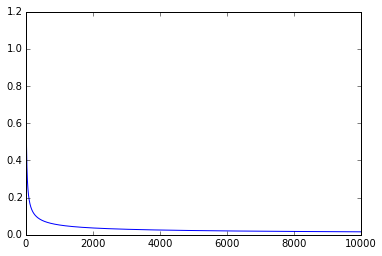

In [15]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.plot(errors)
plt.show()